In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

drive_model_dir = '/content/drive/MyDrive/saved_models'

# Load a specific model
models = {
    "Transfer Learning": model_transfer_learning,
    "No Transfer No Pretrained": model_no_transfer_no_pretrained,
    "From Scratch": model_from_scratch
}

# Save each model to a separate file in Google Drive
for model_name, model in models.items():
    model_path = os.path.join(drive_model_dir, f'{model_name}.pkl')
    with open(model_path, 'rb') as f:
        model = pickle.load(f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predicción y evaluación

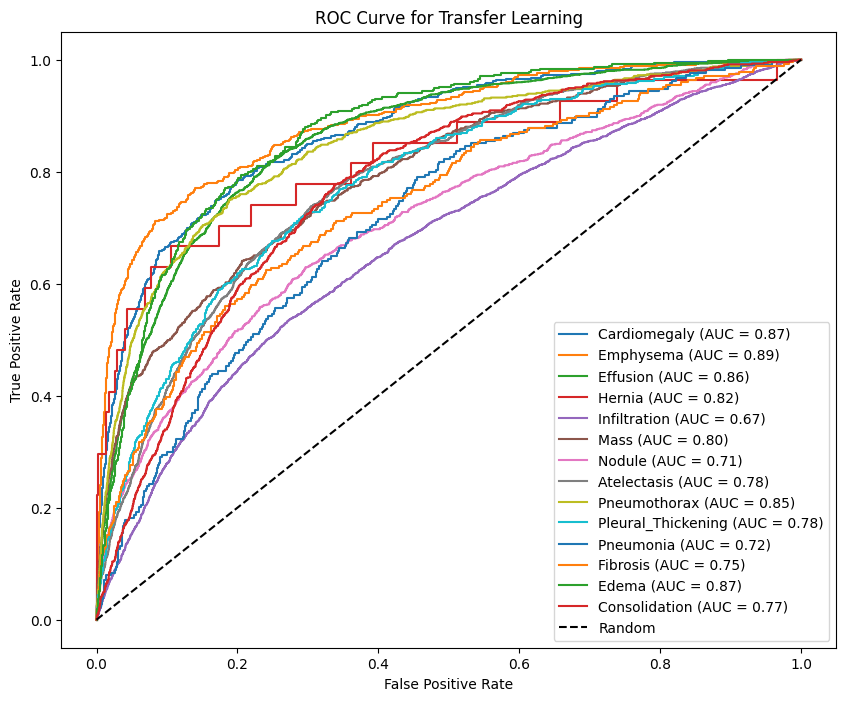

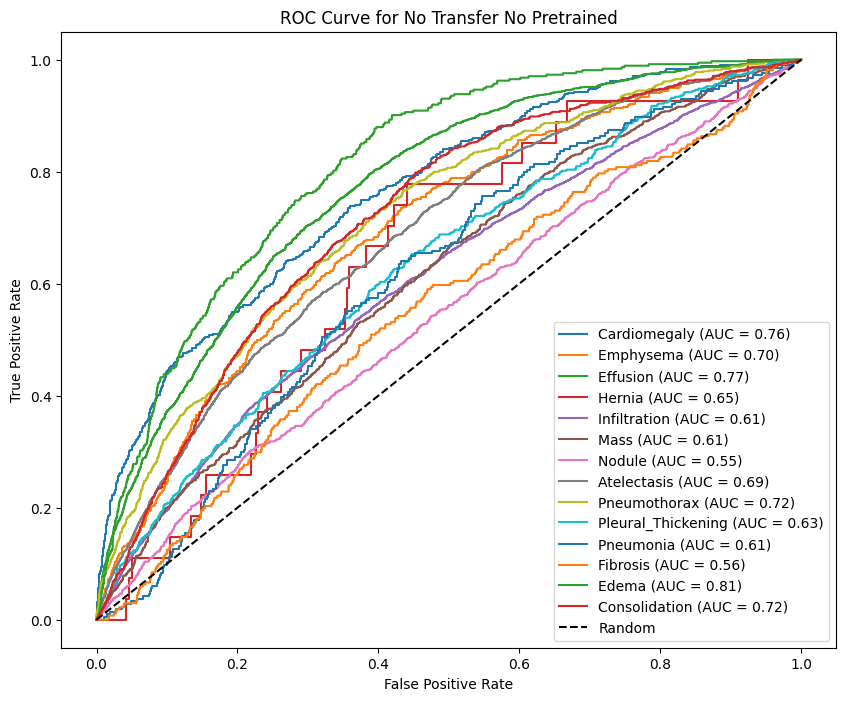

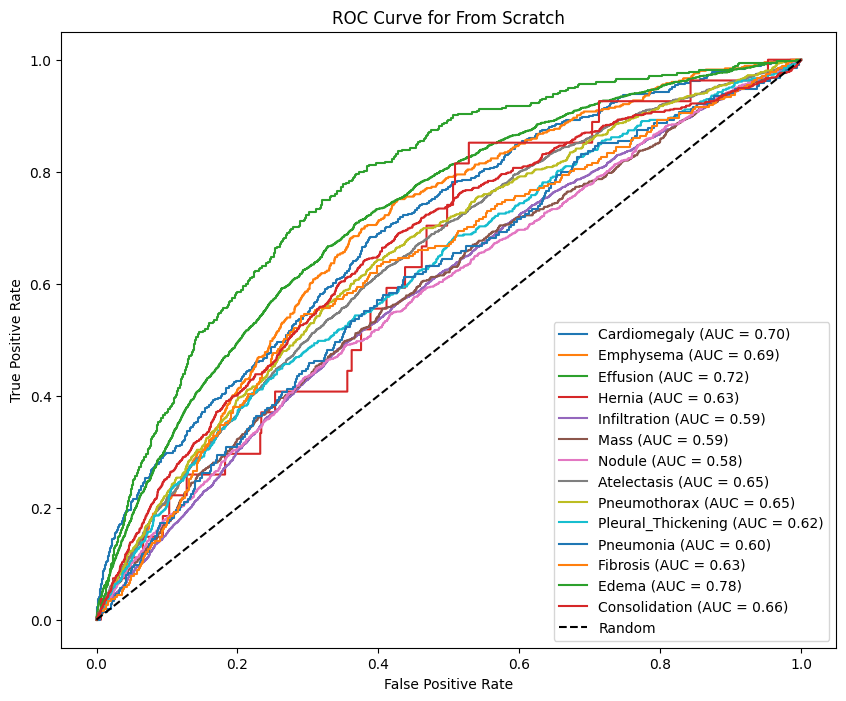

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_per_model(models, test_generator, labels):
    """
    Plots a separate ROC curve for each model, showing curves for each class.

    Args:
        models (dict): Dictionary of models, where keys are model names and values are trained Keras models.
        test_generator: Data generator for the test set.
        labels (list): List of class labels.
    """
    for model_name, model in models.items():
        plt.figure(figsize=(10, 8))  # Create a new figure for each model

        y_true = test_generator.labels
        y_pred_probs = model.predict(test_generator, verbose=0)

        # Calculate and plot ROC curve for each class
        for i, label in enumerate(labels):
            fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Diagonal line for random classifier
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()  # Show the plot for the current model before moving to the next

# Assuming you have these models trained: model_transfer_learning, model_no_transfer_pretrained, model_no_transfer_no_pretrained, model_from_scratch
models = {
    "Transfer Learning": model_transfer_learning,
    "No Transfer No Pretrained": model_no_transfer_no_pretrained,
    "From Scratch": model_from_scratch
}

# Plot a separate ROC curve for each model, showing curves for each class
plot_roc_curve_per_model(models, test_generator, labels)